In [1]:
from agentapp.customerService import build_graph

graph = build_graph()


d:\Projects\CustomerService-AI-Angular-HINLP-Damage-Evaluation\fastapi-backend\agentapp\customerService.py:336: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  web_search_tool = TavilySearchResults(k=3)


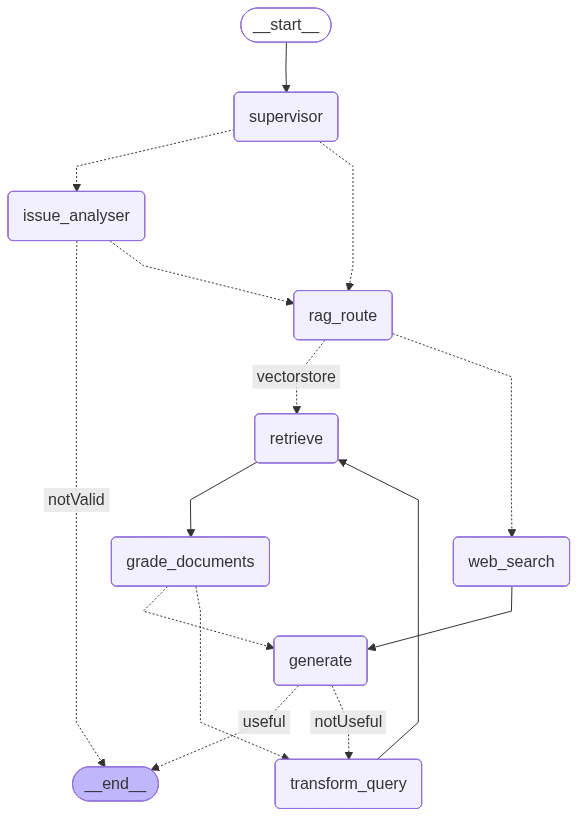

In [2]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [3]:
from agentapp.customerService import vectorstore, issue_sop_vectorstore

question = "facing issue with policy payment  "

## context
docs = vectorstore.similarity_search(
            question,
            k=3,
            filter={"category": "life-query"}
        )

print(f"docs: {docs}")

docs: [Document(id='a6d78fef-1f3b-46cf-9c4f-fdeb92a7a46e', metadata={'category': 'life-query', 'faq_id': 'Step 1 . Research and explain the tax implications of life insurance payouts in \nSwitzerland \nStep 2 . Provide information on any exceptions or special circumstances \nStep 3 . Offer guidance on how to consult with a tax advisor or financial expert'}, page_content='Step 1 . Research and explain the tax implications of life insurance payouts in \nSwitzerland \nStep 2 . Provide information on any exceptions or special circumstances \nStep 3 . Offer guidance on how to consult with a tax advisor or financial expert'), Document(id='03bc8cf2-f010-4497-9cf4-2c13660ad9ff', metadata={'category': 'life-query', 'faq_id': '5'}, page_content='5: Can I cancel my life insurance policy if I change my mind? \nAnswer: Yes, you can cancel your life insurance policy within a certain period (usually 30 \ndays) and receive a refund of premiums paid. After this period, you may be subject to \npenalties

In [4]:
question = "What to do if insurance payments not reflected on users account"

## context
docs = issue_sop_vectorstore.similarity_search(
            question,
            k=3,
            filter={"category": "life_issue_sop"}
        )

print(f"docs: {docs}")

docs: [Document(id='50954350-76c3-4921-8eec-d8d1f4dc882c', metadata={'issue_id': '1', 'category': 'life_issue_sop'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there is no issue with our side. \n2. If payment status is not SUCCESS, then please check then back statement doc. \nIf bank statement has user transaction details, then its fine and user account \nwill get update in few days. \n3. If back statement doc also missing the transaction details, then it is an issue \nwith the bank, we need to create support tickets for bank support to get \nresolution for the user issue.'), Document(id='9532d79d-173d-4d72-ba8a-95647259821f', metadata={'category': 'life_issue_sop', 'issue_id': '3'}, page_content='3:  How to change the address of the policy holder on a specific policy. \n \nSteps to follow: \n1. Call /updateUserdetails/{userID}

In [5]:
graph.invoke({"question":"payment status not reflected for policy 12345"})

descision >>>>>>>>>>>. : step='issue_analyser' type='issue'
issue_analyser >>>>>>>>>>>. : validIssue=True missingProperties=[] issueProblemDesc='payment status not reflected' policyNumber='12345'
---ROUTE TASK CREATION---
---VALID ISSUE TO CALL TOOL---
---RAG DECISION---
source : >>>>>>>  datasource='issue_sop_vectorstore'
---ROUTE QUESTION---
state: {'vectorDecision': 'issue_sop_vectorstore', 'question': 'payment status not reflected for policy 12345', 'decision': 'issue_analyser', 'type': 'issue', 'missingProperties': [], 'issueProblemDesc': 'payment status not reflected', 'policyNumber': '12345', 'validIssue': True}
---ROUTE TO QUESTION TO RAG---
---RETRIEVE---
docs: [Document(id='50954350-76c3-4921-8eec-d8d1f4dc882c', metadata={'issue_id': '1', 'category': 'life_issue_sop'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there 

{'question': 'payment status not reflected',
 'generation': 'To resolve a payment that isn’t reflected, first call the **/getPaymentStatus/{userID}** API. If the status isn’t **SUCCESS**, check the bank statement; if the transaction appears, the account will update in a few days. If the statement also lacks the transaction, create a support ticket with the bank for resolution.',
 'documents': [Document(id='50954350-76c3-4921-8eec-d8d1f4dc882c', metadata={'issue_id': '1', 'category': 'life_issue_sop'}, page_content='1: What to do if insurance payments not reflected on users account. \nSteps to follow: \n1. Call /getPaymentStatus/{userID} API, and check the payment status.  \nIf payment status fine then there is no issue with our side. \n2. If payment status is not SUCCESS, then please check then back statement doc. \nIf bank statement has user transaction details, then its fine and user account \nwill get update in few days. \n3. If back statement doc also missing the transaction detail

In [4]:
graph.invoke({"question":" How do I choose the right life insurance policy for my needs?"})

descision >>>>>>>>>>>. : step='rag_search' type='query'
---RAG DECISION---
source : >>>>>>>  datasource='vectorstore'
---ROUTE QUESTION---
state: {'vectorDecision': 'vectorstore', 'question': ' How do I choose the right life insurance policy for my needs?', 'decision': 'rag_search', 'type': 'query'}
---ROUTE TO QUESTION TO RAG---
---RETRIEVE---
docs: [Document(id='3face353-7308-48d2-b4c8-7b3204775d54', metadata={'faq_id': '2', 'category': 'life-query'}, page_content="2: How do I choose the right life insurance policy for my needs? \nAnswer: To choose the right life insurance policy, consider your age, health, income, family \nsituation, and financial goals. You should also assess your risk tolerance and determine how \nmuch coverage you need. It's recommended to consult with a licensed insurance advisor or \nbroker to help you make an informed decision. \n• Task to execute: \nStep 1 . Develop a questionnaire to help customers assess their needs \nStep 2 . Provide a checklist of factors

{'question': ' How do I choose the right life insurance policy for my needs?',
 'generation': 'To choose the right life insurance policy, assess your age, health, income, family situation, and financial goals, then determine how much coverage you need and your risk tolerance. Use a checklist of factors such as policy type, premium affordability, and benefits, and consider consulting a licensed insurance advisor or broker for personalized guidance. This will help you make an informed decision that aligns with your needs.',
 'documents': [Document(id='3face353-7308-48d2-b4c8-7b3204775d54', metadata={'faq_id': '2', 'category': 'life-query'}, page_content="2: How do I choose the right life insurance policy for my needs? \nAnswer: To choose the right life insurance policy, consider your age, health, income, family \nsituation, and financial goals. You should also assess your risk tolerance and determine how \nmuch coverage you need. It's recommended to consult with a licensed insurance advi

In [6]:
graph.invoke({"question":"car get damages need to get car damage estimation for policy number 12313"})

descision >>>>>>>>>>>. : step='issue_analyser' type='issue'
issue_analyser >>>>>>>>>>>. : validIssue=True missingProperties=[] issueProblemDesc='car get damages need to get car damage estimation' policyNumber='12313'
---ROUTE TASK CREATION---
---VALID ISSUE TO CALL TOOL---
---RAG DECISION---
source : >>>>>>>  datasource='issue_sop_vectorstore'
---ROUTE QUESTION---
state: {'vectorDecision': 'issue_sop_vectorstore', 'question': 'car get damages need to get car damage estimation for policy number 12313', 'decision': 'issue_analyser', 'type': 'issue', 'missingProperties': [], 'issueProblemDesc': 'car get damages need to get car damage estimation', 'policyNumber': '12313', 'validIssue': True}
---ROUTE TO QUESTION TO RAG---
---RETRIEVE---
docs: [Document(id='fc592f4e-b2a6-4771-a89e-bc75883bc23f', metadata={'category': 'life_issue_sop', 'issue_id': '4'}, page_content='4:  How to estimate the vehicle damage estimation. \n \nSteps to follow: \n1. Call /estimateVehicleDamage/{userID}/{imageUrl} 

{'question': 'car get damages need to get car damage estimation',
 'generation': 'To get a car damage estimation, call the\u202f`/estimateVehicleDamage/{userID}/{imageUrl}`\u202fAPI, providing the appropriate user ID and the image URL of the vehicle.',
 'documents': [Document(id='fc592f4e-b2a6-4771-a89e-bc75883bc23f', metadata={'category': 'life_issue_sop', 'issue_id': '4'}, page_content='4:  How to estimate the vehicle damage estimation. \n \nSteps to follow: \n1. Call /estimateVehicleDamage/{userID}/{imageUrl} API with proper userID and \nimageUrl.')],
 'decision': 'issue_analyser',
 'type': 'issue',
 'vectorDecision': 'issue_sop_vectorstore',
 'missingProperties': [],
 'issueProblemDesc': 'car get damages need to get car damage estimation',
 'policyNumber': '12313',
 'validIssue': True}

### SOP AGENT

### Human In Loop 2

In [89]:
import os 
from dotenv import load_dotenv

from typing_extensions import Literal, TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph.message import add_messages

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition, ToolNode

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

from langchain_core.tools import tool
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.agents import AgentAction
from typing import Dict, List, Optional, Any

import uuid


In [47]:
# Load environment variables from the .env file in the same directory as this script
load_dotenv(dotenv_path="agentapp/.env")

# print(f"GROQ_API_KEY: {os.getenv('GROQ_API_KEY')}")

True

In [90]:
from damageEvaluator.image_analyzer import analyze_image

In [92]:
# Agent prompt template
agent_prompt = PromptTemplate.from_template("""
You are an intelligent assistant that follows a given Standard Operating Procedure (SOP) to decide and execute tools step by step.

Your goals:
1. Always follow the provided SOP exactly — do not assume, infer, or hallucinate any extra steps or tools.
2. Use only the tools listed below. Do not call any tool that is not in the SOP.
3. If this is the first execution (previous tool response is null), start from the first relevant step in the SOP.
4. If the SOP step depends on the previous tool’s result, decide the next tool accordingly.
5. Always interrupt before executing a tool to ask for user approval.

---

**Format to follow strictly:**
SOP: {operating_procedure}

Thought: Explain what step in the SOP should be executed next, and why.
Action: Choose one action (tool) to execute next — must be one of [{tool_names}].

---

**Available tools:**
{tools}

userID: {userID}
imageURL: {imageURL}                                          
previous tool response: {toolRes}

---

Important:
- Execute one tool at a time — do not run multiple tools in a single step.
- Never skip a tool required by the SOP.
- Never make assumptions or create steps outside the SOP.
- Decide whether to call a tool only if it’s required by the SOP and appropriate based on the last tool’s response.
- REMEMBER: Also please dont call any tools those are not specified in the SOP, only execute the tools based on the given SOP: {operating_procedure}. exit after all tool exections completed
""")

class GraphState(TypedDict):
   operating_procedure: str
   messages: Annotated[Optional[List[any]], add_messages]
   toolRes: Optional[List[any]]
   userID: str
   imageURL: Optional[List[str]]

groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key:
    os.environ["GROQ_API_KEY"] = groq_api_key
else:
    raise ValueError("GROQ_API_KEY environment variable is not set")


llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0)


# In-memory payment data
payment_data = {
    "U001": {"status": "success", "amount": "₹5000", "date": "2024-01-15", "name": "John Doe"},
    "U002": {"status": "failed", "amount": "₹3000", "date": "2024-01-14", "name": "Jane Smith"},
    "U003": {"status": "pending", "amount": "₹7500", "date": "2024-01-16", "name": "Bob Wilson"}
}

@tool
def get_payment_status(user_id: str) -> dict:
    """Get payment status from API for a user ID."""
    import time
    
    # Simulate API processing time
    time.sleep(1)
    
    # Access payment data directly (simulating API call)
    if user_id in payment_data:
        payment_info = payment_data[user_id]
        return {
            "user_id": user_id,
            "payment_status": payment_info["status"],
            "amount": payment_info["amount"],
            "date": payment_info["date"],
            "user_name": payment_info["name"],
            "api_response_time": "1 second"
        }
    else:
        return {
            "user_id": user_id,
            "payment_status": "failed",
            "error": "Payment record not found",
            "message": f"User ID '{user_id}' not found."
        }

@tool
def check_bank_statement(user_id: str) -> dict:
    """Get bank statement status for a user ID"""
    # return {
    #     "user_id": user_id,
    #     "status": "SUCCESS",
    # }
    return {
        "user_id": user_id,
        "status": "PENDING",
    }

@tool
def create_support_ticket(tool_input: str) -> dict:
    """Create support ticket for user issues. Input should be 'user_id,issue_description'"""
    parts = tool_input.split(',', 1)
    user_id = parts[0].strip()
    issue = parts[1].strip() if len(parts) > 1 else "General issue"
    
    return {
        "ticket_id": f"TKT-{uuid.uuid4().hex[:8].upper()}",
        "user_id": user_id,
        "issue": issue,
        "status": "created",
        "priority": "high"
    }

@tool
def change_secondName(user_id: str) -> dict:
    """Update the user secondName for a user ID"""
    return {
        "user_id": user_id,
        "status": "SUCCESS",
    }

@tool
def estimateVehicleDamage(user_id: str, imageURL: str) -> dict:
    """Estimate vehicle damage for a user ID"""
    if not imageURL:
        return {
            "user_id": user_id,
            "status": "ERROR",
            "error": "No image URL provided"
        }
    
    # Convert URL to local file path
    # e.g., http://localhost:8000/images/accident-damage-car.jpg -> images/accident-damage-car.jpg
    if imageURL.startswith("http"):
        image_path = imageURL.split("/images/")[-1]
        image_path = os.path.join("images", image_path)
    else:
        image_path = imageURL

    print(f"estimateVehicleDamage tool image_path >>>>>>> :", image_path)

    result = analyze_image(session_id="session_001", images=[image_path], description="test")

    print(f"tool estimateVehicleDamage result: >>>>>>>>> ",result)

    return {
        "user_id": user_id,
        "imageURL": imageURL,
        "status": "SUCCESS",
        "result": result
    }



# Create LangChain Agent
tools = [
    get_payment_status,
    create_support_ticket,
    check_bank_statement,
    change_secondName,
    estimateVehicleDamage
]

llm_with_tools = llm.bind_tools(tools)

def assistant(state: GraphState):
    """Plan what actions the agent wants to take"""
    tool_descriptions = "\n".join([f"{tool.name}: {tool.description}" for tool in tools])
    tool_names = ", ".join([tool.name for tool in tools])
    
    prompt_text = agent_prompt.format(
        tools=tool_descriptions,
        tool_names=tool_names,
        operating_procedure=state["operating_procedure"],
        userID= state["userID"],
        toolRes= state.get("toolRes", []),
        imageURL= state.get("imageURL", []),
    )

    print(f"prompt_text >>>>>> : {prompt_text}")

    return {"messages": [llm_with_tools.invoke([prompt_text] + state.get("messages", []))]}


tools_node = ToolNode(tools)

def handle_tool_output(state):
    # Run the ToolNode manually
    tool_result = tools_node.invoke(state)
    
    # ✅ Extract the actual ToolMessage(s)
    tool_messages = tool_result.get("messages", [])
    
    messages = state.get("messages", [])
    messages.extend(tool_messages)  # ✅ add ToolMessages, not a dict

    return {
        **state,
        "toolRes": tool_messages,  # optional, for prompt reference
        "messages": messages
    }

workflow = StateGraph(GraphState)
workflow.add_node("assistant", assistant)
workflow.add_node("tools", handle_tool_output)
workflow.add_edge(START, "assistant")

workflow.add_conditional_edges("assistant", tools_condition)
workflow.add_edge("tools", "assistant")


In [93]:
# Compile
memory = MemorySaver()
graph = workflow.compile(interrupt_before=["tools"] ,checkpointer=memory)

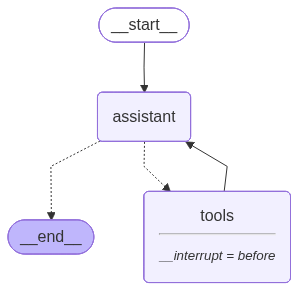

In [94]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [95]:
query = {
    "operating_procedure": "If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.",
    "userID": "U002"
}

In [96]:
thread = {"configurable": {"thread_id": "1234"}}
graph.invoke(query, thread)

prompt_text >>>>>> : 
You are an intelligent assistant that follows a given Standard Operating Procedure (SOP) to decide and execute tools step by step.

Your goals:
1. Always follow the provided SOP exactly — do not assume, infer, or hallucinate any extra steps or tools.
2. Use only the tools listed below. Do not call any tool that is not in the SOP.
3. If this is the first execution (previous tool response is null), start from the first relevant step in the SOP.
4. If the SOP step depends on the previous tool’s result, decide the next tool accordingly.
5. Always interrupt before executing a tool to ask for user approval.

---

**Format to follow strictly:**
SOP: If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  
If the status is not SUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  
If the bank statement also lacks the transaction, file a support ticket with 

{'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.',
 'messages': [AIMessage(content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n", additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': '{"user_id":"U002"}'

In [97]:
state = graph.get_state(thread)
state.next

('tools',)

In [98]:
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n", additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': 

In [99]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

print(f"tool calls: {tool_calls}")

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n" additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'get_payment_status'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 116, 'prompt_tokens': 1034, 'total_tokens': 1150, 'completion_time': 0.450329401, 'prompt_time': 0.093943092, 'queue_time': 0.052462617, 'total_time': 0.544272493}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_fb4860a75b', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', '

In [100]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.

The next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).
Tool Calls:
  get_payment_status (qs1224188)
 Call ID: qs1224188
  Args:
    user_id: U002
================================= Tool Message =================================
Name: get_payment_status

{"user_id": "U002", "payment_status": "failed", "amount": "₹3000", "date": "2024-01-14", "user_name": "Jane Smith", "api_response_time": "1 second"}
prompt_text >>>>>> : 
You are an intelligent assistant that follows a given Standard Operating Procedure

In [101]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n", additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': 

In [102]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

print(f"tool calls: {tool_calls}")

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content="Since the payment status isn't reflected as SUCCESS, the next step in the SOP is to check the bank statement document. \n\n" additional_kwargs={'tool_calls': [{'id': '4vd7x3vpv', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'check_bank_statement'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 1210, 'total_tokens': 1253, 'completion_time': 0.111383794, 'prompt_time': 0.060562412, 'queue_time': 0.053187918, 'total_time': 0.171946206}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_0ca3f8c386', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--00b9ebfe-8dbd-47d9-acbb-a5c67c3f3932-0' tool_calls=[{'name': 'check_bank_statement', 'args': {'user_id': 'U002'}, 'id': '4vd7x3vpv', 'type': 'tool_call'}] usage_metadata={'input_tokens': 1210, 'output_tokens': 43, 'total_tokens': 1253}
tool calls: [{'id': '4vd7x3vpv', 'function': {'arguments'

In [103]:
state.next

('tools',)

In [104]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content="Since the payment status isn't reflected as SUCCESS, the next step in the SOP is to check the bank statement document. \n\n" additional_kwargs={'tool_calls': [{'id': '4vd7x3vpv', 'function': {'arguments': '{"user_id":"U002"}', 'name': 'check_bank_statement'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 1210, 'total_tokens': 1253, 'completion_time': 0.111383794, 'prompt_time': 0.060562412, 'queue_time': 0.053187918, 'total_time': 0.171946206}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_0ca3f8c386', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--00b9ebfe-8dbd-47d9-acbb-a5c67c3f3932-0' tool_calls=[{'name': 'check_bank_statement', 'args': {'user_id': 'U002'}, 'id': '4vd7x3vpv', 'type': 'tool_call'}] usage_metadata={'input_tokens': 1210, 'output_tokens': 43, 'total_tokens': 1253}
Tool calls found: check_bank_statement


In [105]:
latest_toolRes = state.values["toolRes"]

lool_res = latest_toolRes[-1]  # the most recent message
print(lool_res)

content='{"user_id": "U002", "payment_status": "failed", "amount": "₹3000", "date": "2024-01-14", "user_name": "Jane Smith", "api_response_time": "1 second"}' name='get_payment_status' id='542583ce-fe9a-4d36-b50c-6bfb811517b9' tool_call_id='qs1224188'


In [106]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

Since the payment status isn't reflected as SUCCESS, the next step in the SOP is to check the bank statement document.
Tool Calls:
  check_bank_statement (4vd7x3vpv)
 Call ID: 4vd7x3vpv
  Args:
    user_id: U002
================================= Tool Message =================================
Name: check_bank_statement

{"user_id": "U002", "status": "PENDING"}
prompt_text >>>>>> : 
You are an intelligent assistant that follows a given Standard Operating Procedure (SOP) to decide and execute tools step by step.

Your goals:
1. Always follow the provided SOP exactly — do not assume, infer, or hallucinate any extra steps or tools.
2. Use only the tools listed below. Do not call any tool that is not in the SOP.
3. If this is the first execution (previous tool response is null), start from the first relevant step in the SOP.
4. If the SOP step depends on the previous tool’s result, decide the next tool accordin

In [107]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n", additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': 

In [108]:
state.next

('tools',)

In [109]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  create_support_ticket (n25nvn8g2)
 Call ID: n25nvn8g2
  Args:
    tool_input: U002,Payment status not reflected
================================= Tool Message =================================
Name: create_support_ticket

{"ticket_id": "TKT-B3A201CA", "user_id": "U002", "issue": "Payment status not reflected", "status": "created", "priority": "high"}
prompt_text >>>>>> : 
You are an intelligent assistant that follows a given Standard Operating Procedure (SOP) to decide and execute tools step by step.

Your goals:
1. Always follow the provided SOP exactly — do not assume, infer, or hallucinate any extra steps or tools.
2. Use only the tools listed below. Do not call any tool that is not in the SOP.
3. If this is the first execution (previous tool response is null), start from the first relevant step in the SOP.
4. If the SOP step depends on the previous tool’s result, decide the next tool acco

In [110]:
state = graph.get_state(thread)
state

StateSnapshot(values={'operating_procedure': 'If a payment status isn’t reflected, first call the `/getPaymentStatus/{userID}` API to confirm the status.  \nIf the status is not\u202fSUCCESS, check the bank statement document; if the transaction appears there, the account will update in a few days.  \nIf the bank statement also lacks the transaction, file a support ticket with the bank to resolve the issue.', 'messages': [AIMessage(content="To follow the provided SOP exactly, the first step is to confirm the payment status using the `/getPaymentStatus/{userID}` API because the payment status isn't reflected. This is the initial step as per the SOP, and no previous tool response is available to influence the next step.\n\nThe next tool to execute should be `get_payment_status` because it directly aligns with the first step of the SOP, which is to check the payment status for the given `userID` (U002).\n\n", additional_kwargs={'tool_calls': [{'id': 'qs1224188', 'function': {'arguments': 

In [111]:
state.next

()

## Damage Evaluator

In [112]:
query = {
    "operating_procedure": "To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.",
    "userID": "U002",
    "imageURL": "../images/accident-damage-car.jpg"
}

In [113]:
img_path = "images/accident-damage-car.jpg"
if not os.path.exists(img_path):
    print(f"Image not found at {img_path}")
else:
    print(f"Image found at {img_path}")

Image found at images/accident-damage-car.jpg


In [114]:
thread = {"configurable": {"thread_id": "1238"}}
graph.invoke(query, thread)

prompt_text >>>>>> : 
You are an intelligent assistant that follows a given Standard Operating Procedure (SOP) to decide and execute tools step by step.

Your goals:
1. Always follow the provided SOP exactly — do not assume, infer, or hallucinate any extra steps or tools.
2. Use only the tools listed below. Do not call any tool that is not in the SOP.
3. If this is the first execution (previous tool response is null), start from the first relevant step in the SOP.
4. If the SOP step depends on the previous tool’s result, decide the next tool accordingly.
5. Always interrupt before executing a tool to ask for user approval.

---

**Format to follow strictly:**
SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.

Thought: Explain what step in the SOP should be executed next, and why.
Action: Choose one action (tool) to execute next — must be one of [get_

{'operating_procedure': 'To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.',
 'messages': [AIMessage(content="SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.\nThought: The SOP requires estimating vehicle damage using the user's ID and a photo of the vehicle. Since we have the userID and imageURL, we can proceed with estimating the vehicle damage.\nAction: Choose the estimateVehicleDamage tool to estimate the vehicle damage for the given user ID and image URL.\n\n", additional_kwargs={'tool_calls': [{'id': 'df5yb17t4', 'function': {'arguments': '{"imageURL":"../images/accident-damage-car.jpg","user_id":"U002"}', 'name': 'estimateVehicleDamage'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_toke

In [115]:
state = graph.get_state(thread)
state.next

('tools',)

In [116]:
state

StateSnapshot(values={'operating_procedure': 'To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.', 'messages': [AIMessage(content="SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.\nThought: The SOP requires estimating vehicle damage using the user's ID and a photo of the vehicle. Since we have the userID and imageURL, we can proceed with estimating the vehicle damage.\nAction: Choose the estimateVehicleDamage tool to estimate the vehicle damage for the given user ID and image URL.\n\n", additional_kwargs={'tool_calls': [{'id': 'df5yb17t4', 'function': {'arguments': '{"imageURL":"../images/accident-damage-car.jpg","user_id":"U002"}', 'name': 'estimateVehicleDamage'}, 'type': 'function'}]}, response_metadata={'token_usage

In [117]:
latest_messages = state.values["messages"]

latest_message = latest_messages[-1]  # the most recent message
print(latest_message)

# Check for tool_calls
tool_calls = latest_message.additional_kwargs.get("tool_calls", [])

print(f"tool calls: {tool_calls}")

if tool_calls:
    # Extract tool names
    tool_names = [t["function"]["name"] for t in tool_calls if "function" in t]
    print("Tool calls found:", tool_names[-1])
else:
    print("No tool calls found.")

content="SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.\nThought: The SOP requires estimating vehicle damage using the user's ID and a photo of the vehicle. Since we have the userID and imageURL, we can proceed with estimating the vehicle damage.\nAction: Choose the estimateVehicleDamage tool to estimate the vehicle damage for the given user ID and image URL.\n\n" additional_kwargs={'tool_calls': [{'id': 'df5yb17t4', 'function': {'arguments': '{"imageURL":"../images/accident-damage-car.jpg","user_id":"U002"}', 'name': 'estimateVehicleDamage'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 966, 'total_tokens': 1098, 'completion_time': 0.35455396, 'prompt_time': 0.093225335, 'queue_time': 0.056440315, 'total_time': 0.447779295}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_e

In [118]:
for event in graph.stream(None, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()

================================== Ai Message ==================================

SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.
Thought: The SOP requires estimating vehicle damage using the user's ID and a photo of the vehicle. Since we have the userID and imageURL, we can proceed with estimating the vehicle damage.
Action: Choose the estimateVehicleDamage tool to estimate the vehicle damage for the given user ID and image URL.
Tool Calls:
  estimateVehicleDamage (df5yb17t4)
 Call ID: df5yb17t4
  Args:
    imageURL: ../images/accident-damage-car.jpg
    user_id: U002
estimateVehicleDamage tool image_path >>>>>>> : ../images/accident-damage-car.jpg
tool estimateVehicleDamage result: >>>>>>>>>  {'session_id': 'session_001', 'analysis': [{'image': '../images/accident-damage-car.jpg', 'error': 'file not found'}]}
================================= Too

In [119]:
state = graph.get_state(thread)

In [120]:
state

StateSnapshot(values={'operating_procedure': 'To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.', 'messages': [AIMessage(content="SOP: To estimate the damage, call the API endpoint `/estimateVehicleDamage/{userID}/{imageUrl}` with the user’s ID and a photo of the vehicle. Then update the address details as required.\nThought: The SOP requires estimating vehicle damage using the user's ID and a photo of the vehicle. Since we have the userID and imageURL, we can proceed with estimating the vehicle damage.\nAction: Choose the estimateVehicleDamage tool to estimate the vehicle damage for the given user ID and image URL.\n\n", additional_kwargs={'tool_calls': [{'id': 'df5yb17t4', 'function': {'arguments': '{"imageURL":"../images/accident-damage-car.jpg","user_id":"U002"}', 'name': 'estimateVehicleDamage'}, 'type': 'function'}]}, response_metadata={'token_usage

In [121]:
state.next

()